# MATH 210 Introduction to Mathematical Computing

**March 28, 2025**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

## Polynomial Interpolation

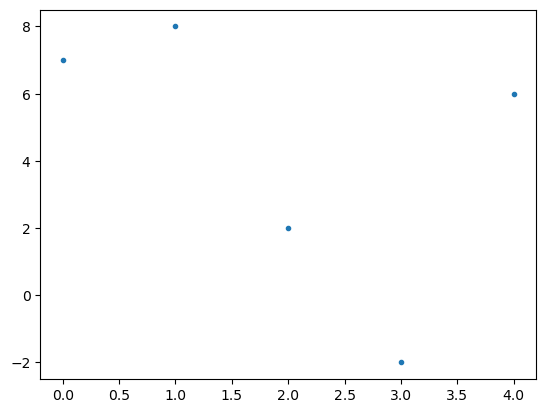

In [12]:
x = np.array([0.,1.,2.,3.,4.])
y = np.array([7.,8.,2.,-2.,6.])
plt.plot(x,y,'.')
plt.show()

Create the Vandermonde matrix:

In [13]:
A = np.vander(x,increasing=True)
A

array([[  1.,   0.,   0.,   0.,   0.],
       [  1.,   1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.,  16.],
       [  1.,   3.,   9.,  27.,  81.],
       [  1.,   4.,  16.,  64., 256.]])

In [14]:
A = np.column_stack([x**k for k in range(len(x))])
A

array([[  1.,   0.,   0.,   0.,   0.],
       [  1.,   1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.,  16.],
       [  1.,   3.,   9.,  27.,  81.],
       [  1.,   4.,  16.,  64., 256.]])

In [15]:
c = la.solve(A,y)

In [16]:
c

array([ 7.        ,  7.25      , -7.54166667,  1.25      ,  0.04166667])

In [19]:
p = lambda x: sum([c[k]*x**k for k in range(len(c))])

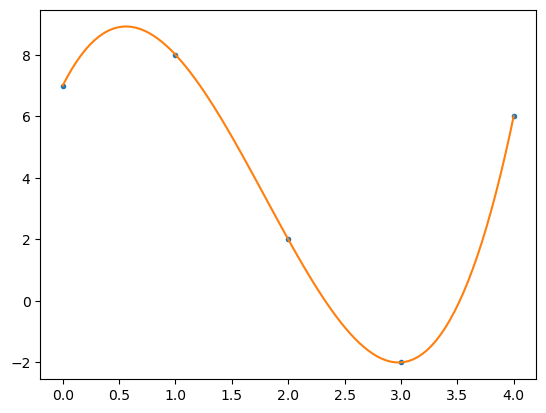

In [20]:
xs = np.linspace(x[0],x[-1],100)
ys = p(xs)
plt.plot(x,y,'.')
plt.plot(xs,ys)
plt.show()

-2.7005922344639104e-20


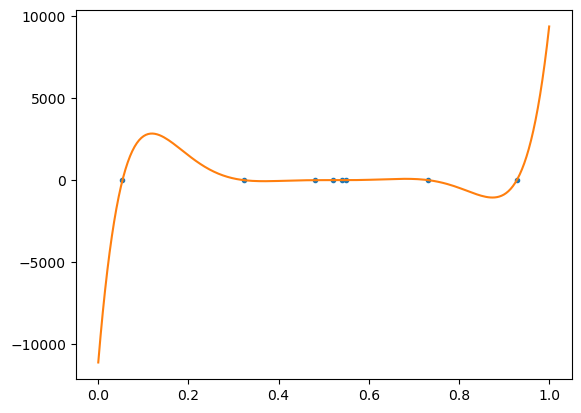

In [53]:
N = 8
x = np.random.rand(N)
y = np.random.rand(N)
A = np.vander(x,increasing=True)
c = la.solve(A,y)
p = lambda x: sum([c[k]*x**k for k in range(len(c))])
xs = np.linspace(0,1,200)
ys = p(xs)
plt.plot(x,y,'.')
plt.plot(xs,ys)
plt.show()

In [54]:
print(la.det(A))

-2.7005922344639104e-20


## General Interpolation

$$
f(x) = c_0 + c_1\sin(x) + c_2\cos(x) + c_3\sin(2x) + c_4\cos(2x)
$$

In [74]:
x = np.array([0.,1.,2.,3.,4.])
y = np.array([7.,8.,2.,-2.,6.])

In [82]:
A1 = np.column_stack([np.ones(5),np.sin(x),np.cos(x),np.sin(2*x),np.cos(2*x)])
c1 = la.solve(A1,y)

In [83]:
f = lambda x: c1[0] + c1[1]*np.sin(x) + c1[2]*np.cos(x) + c1[3]*np.sin(2*x) + c1[4]*np.cos(2*x)

In [84]:
A2 = np.vander(x,increasing=True)
c2 = la.solve(A2,y)
p = lambda x: sum([c2[k]*x**k for k in range(len(c2))])

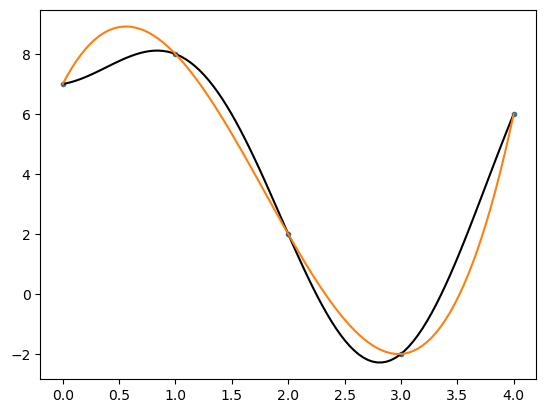

In [85]:
xs = np.linspace(x[0],x[-1],100)
ys1 = f(xs)
ys2 = p(xs)
plt.plot(x,y,'.')
plt.plot(xs,ys1,'k')
plt.plot(xs,ys2)
plt.show()